In [2]:
from soutce.wgangp.celeba_utils import Celebaloader
trainset, trainloader, testset, testloader = Celebaloader('./')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import torch
from soutce.wgangp.wgan_model import WGAN_GP

z_dim = 100

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
from wgan_model import WGAN_GP

model = WGAN_GP(3, z_dim)
model.to(device)

WGAN_GP(
  (G): Generator(
    (fc): Sequential(
      (0): Linear(in_features=100, out_features=8192, bias=False)
      (1): BatchNorm1d(8192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (convs): Sequential(
      (0): Sequential(
        (0): ConvTranspose2d(512, 256, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (1): Sequential(
        (0): ConvTranspose2d(256, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (2): Sequential(
        (0): ConvTranspose2d(128, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, af

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
PATH = '/content/drive/My Drive'
NUM = 30
checkpoint = torch.load(PATH + '/wgangp_gen_{}.pt'.format(NUM))
model.G.load_state_dict(checkpoint)
checkpoint = torch.load(PATH + '/wgangp_disc_{}.pt'.format(NUM))
model.D.load_state_dict(checkpoint)

<All keys matched successfully>

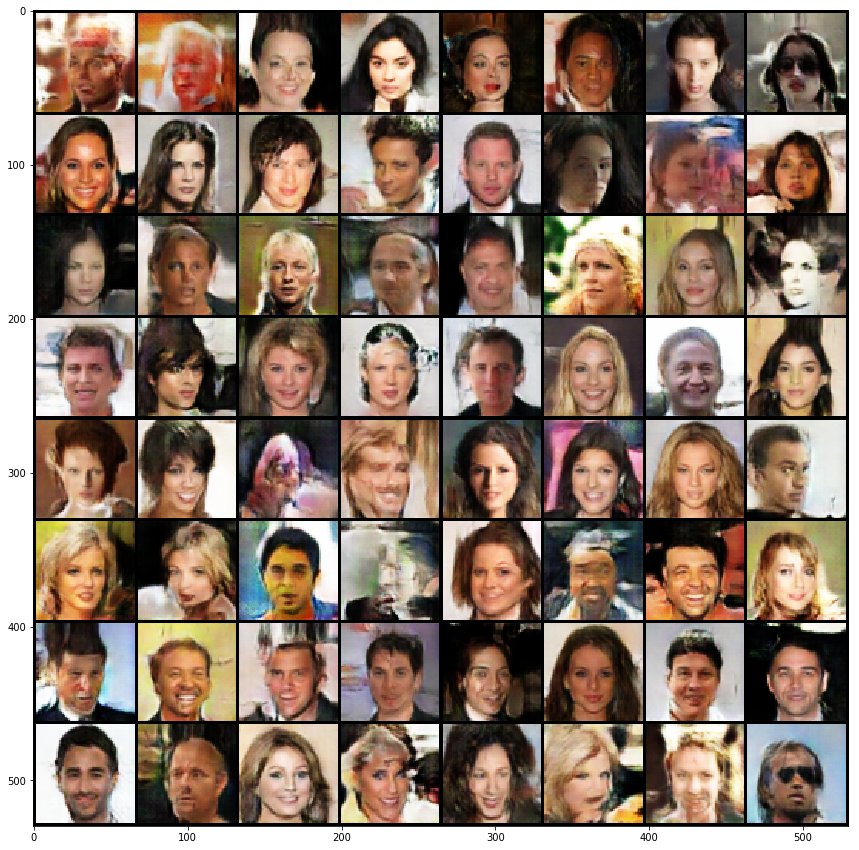

In [15]:
from torch.autograd import Variable
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

z_sample = Variable(torch.randn(64, z_dim))
z_sample = z_sample.to(device)

model.G.eval()
model.D.eval()

grid = make_grid(model.G(z_sample).cpu().data, normalize=True)
plt.figure(figsize=(15, 15))
grid = np.transpose(grid.numpy().clip(0, 1), (1, 2, 0))
plt.imshow(grid)
plt.show()